# Анализ тарифов телеком-компании

**Цель проекта**:  
Определение перспективного тарифа для телеком-компании. Заказчик исследования коммерческий департамент, необходимо выяснить какой тариф приносит больше денег. Это необходимо для планирования и корректровок рекламного бюджет.  

**Имеющиеся данные:**  
  
В нашем распоряжении небольшая выборка клиентов - данные 500 пользователей «Мегалайна»:  
- личные данные (ФИ, возраст, город, тариф, период пользования услугами), 
- данные о длительности звонков, количестве сообщений, объеме интернет-трафика по каждому пользователю за 2018 год,
- данные по стоимости тарифов. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра».  

**Ход исследования**  
- предобработка данных
- создания портрета пользователя
- анализ использования минут разговора, СМС и интернет-трафика в разрезе тарифного плана
- проверка гипотез


## Изучение данных из файла

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import math as mt
from functools import reduce

In [3]:
local_path = './'
server_path = '/datasets/'
files = ['calls', 'internet', 'messages', 'tariffs', 'users']
data_frames = []
for file in files:
    try:
        exec(f"data_{file} = pd.read_csv('{local_path}{file}.csv')")
        data_frames.append(f"data_{file}")
    except:
        exec(f"data_{file} = pd.read_csv('{server_path}{file}.csv')")
        data_frames.append(f"data_{file}")

In [4]:
for df in data_frames:
    print(df)
    locals().get(df).info()
    display(locals().get(df).head())
    print('\n','_'*50, '\n')

data_calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000



 __________________________________________________ 

data_internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000



 __________________________________________________ 

data_messages
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000



 __________________________________________________ 

data_tariffs
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



 __________________________________________________ 

data_users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra



 __________________________________________________ 



### Вывод

Методом info() получена общая информация по всем DataFrame.  
    
Пустые значения во всех столбцах всех DF отсутствуют, иключение столбец "churn_date" датафрейма "data_users".  
Однако здесь пустое значение оправдано, т.к. это свидетельствует о действительности тарифа на момент выгрузки данных.
    
Названия столбцов во всех DF корректны - отсутствуют лишние пробелы и кирилические символы, а в качестве разделителя слов использовано подчеркивание.  
   
Типы данные столбцов соответствуют, содержащимся в них данных. Исключение составляют столбцы с датами в DF:
- "data_calls" - call_date, 
- "data_internet" - session_date,
- "data_messages" - messages_date
- "data_users" - churn_date, reg_date
    
в них данные представлены в виде строк.  
Для использования их в дальнейших расчетах они будут приведены к типу данных datetime.  
    
В разных DF одинаковые столбцы (например user_id) имеют один тип данных, это упростит объединение таблиц.


## Предобработка данных

### Изменение типов данных и добавление столбца "месяц"

In [5]:
data_users['churn_date'].fillna(value=0, inplace=True)

In [6]:
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,0,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,0,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,0,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,0,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [7]:
dframes = [data_calls, data_internet, data_messages, data_users, ]
colmns = ['call_date', 'session_date', 'message_date', 'reg_date']
for i in range(len(dframes)):
    dframes[i][colmns[i]] = pd.to_datetime(dframes[i][colmns[i]], format='%Y-%m-%d')
    dframes[i]['month'] = dframes[i][colmns[i]].dt.month
data_users.rename(columns={'month':'reg_month'}, inplace=True)

In [8]:
data_users.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     5 non-null      int64         
 1   age         5 non-null      int64         
 2   churn_date  5 non-null      object        
 3   city        5 non-null      object        
 4   first_name  5 non-null      object        
 5   last_name   5 non-null      object        
 6   reg_date    5 non-null      datetime64[ns]
 7   tariff      5 non-null      object        
 8   reg_month   5 non-null      int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 488.0+ bytes


### Удаление дубликатов

In [9]:
for df in data_frames:
    print(df)
    print(locals().get(df).duplicated().sum())
    print('')

data_calls
0

data_internet
0

data_messages
0

data_tariffs
0

data_users
0



### Удаление столбца 

In [10]:
# DF был загружен без указания уже существующей колонки с индексами (index_col=0), произошло ее дублирование.
# для чистоты данных удалим лишнюю
data_internet.drop(columns='Unnamed: 0', inplace=True)

### Вывод

   
Данные в столбцах типа object (строка) для использования их в дальнейших расчетах приведены к типу данных datetime в DF 'data_calls', 'data_internet', data_messages, 'data_users'.  
    
Для последующей аналитики в разрезе месяца добавлен соответствующий столбец.    
    
Проведена проверка на наличие дубликатов по всем DF. Во всех DataFrame дубликаты отсутствуют.


## Портрет пользователя

- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).


In [11]:
data_calls['duration'] = np.ceil(data_calls['duration'])

data_calls_corr = data_calls.query('duration != 0')

group_calls = data_calls_corr.pivot_table(
    index=['user_id', 'month'], 
    values=['duration'], 
    aggfunc=['sum', 'count'])

group_calls.columns = ['sum_calls', 'count_calls']

In [12]:
group_messages = data_messages.pivot_table(
    index=['user_id', 'month'], 
    values=['message_date'], 
    aggfunc='count')

group_messages.columns = ['count_mess']

In [13]:
group_internet = data_internet.pivot_table(
    index=['user_id', 'month'], 
    values=['mb_used'], 
    aggfunc='sum')

group_internet.columns = ['sum_internet']

In [14]:
big_table = reduce(lambda  left, right: pd.merge(left, right, on=['user_id', 'month'],
                                                how='outer'), 
                   [group_calls, group_messages, group_internet, ]).reset_index()

big_table = big_table.merge(data_users[['user_id', 'tariff', 'reg_month']], on=['user_id'])

big_table = big_table.fillna(0)

In [15]:
tariff_smart = data_tariffs.query('tariff_name == "smart"')
tariff_ultra = data_tariffs.query('tariff_name == "ultra"')

In [16]:
def month_cost(row):
    calls = row['sum_calls']
    mess = row['count_mess']
    mb = row['sum_internet']
    tariff = row['tariff']

    total_money = 0
    
    if tariff == 'smart':
        total_money += tariff_smart['rub_monthly_fee'].item()
        
        total_money += np.where(
            calls - tariff_smart['minutes_included'].item() > 0, 
            int((calls - tariff_smart['minutes_included']) * tariff_smart['rub_per_minute'].item()),
            0
        )
        
            
        total_money +=  np.where(
            mess - tariff_smart['messages_included'].item() > 0,
            (mess - tariff_smart['messages_included']) * tariff_smart['rub_per_message'].item(),
            0
        )
            
        total_money +=  np.where(
            mb - tariff_smart['mb_per_month_included'].item() > 0,
            mt.ceil((mb - tariff_smart['mb_per_month_included'].item())/1024) * tariff_smart['rub_per_gb'].item(),
            0
        )    
        

    else:
        total_money += tariff_ultra['rub_monthly_fee'].item()
        
        total_money += np.where(
            calls - tariff_ultra['minutes_included'].item() > 0, 
            int((calls - tariff_ultra['minutes_included']) * tariff_ultra['rub_per_minute'].item()),
            0
        )
        
            
        total_money +=  np.where(
            mess - tariff_ultra['messages_included'].item() > 0,
            (mess - tariff_ultra['messages_included']) * tariff_ultra['rub_per_message'].item(),
            0
        )
            
        total_money +=  np.where(
            mb - tariff_ultra['mb_per_month_included'].item() > 0,
            mt.ceil((mb - tariff_ultra['mb_per_month_included'].item())/1024) * tariff_ultra['rub_per_gb'].item(),
            0
        )            
       
    return int(total_money)

In [17]:
big_table['total_costs'] = big_table.apply(month_cost, axis=1)

### Вывод

В DF 'data_calls', 'data_messages', 'data_internet' при помощи метода pivot_table получены сгруппированные данные по каждому пользователю в разрезе месяца.  
Для объединения нескольких DF в один применен метод merge. Получившиеся после слияния отсутствующие значения (NaN) заменены методом fillna() на нули.  
Это позволит производить в дальнейшем математические операции с этими данными.    
На основании сводных данных произведен расчет ежемесячных расходов каждого пользователя по каждой услуге, входящей в тарифный план  (абонентская плата и сверхлимитные использования звонков, СМС и интернета).  
Для этого написана функция month_cost() и применена методом apply к сводному накопительному DF big_table.
    


## Анализ использования минут разговора, СМС и интернет-трафика в разрезе тарифного плана

- расчет среднего количества, дисперсии и стандартного отклонения по показателям по каждому из тарифов:
    * количество израсходованных минут разговора
    * количество отправленных сообщений 
    * объем израсходованного интернет-трафика в месяц


- построение гистограмм по полученным данным
- описание распределения


### Расчет среднего количества, дисперсии и стандартного отклонения по показателям по каждому из тарифов

In [18]:
stats_table = big_table.pivot_table(
    index=['tariff'], 
    values=['sum_calls', 
            'count_mess', 
            'sum_internet']
)

stats_table.columns = ['mean_mess', 'mean_calls', 'mean_internet']

In [19]:
smart_slice = big_table.query('tariff == "smart"')[['sum_calls', 'count_mess', 'sum_internet']]
var_smart = np.var(smart_slice)
std_smart = np.std(smart_slice)

In [20]:
ultra_slice = big_table.query('tariff == "ultra"')[['sum_calls', 'count_mess', 'sum_internet']]
var_ultra = np.var(ultra_slice)
std_ultra = np.std(ultra_slice)

In [21]:
var_smart = (pd.DataFrame(var_smart, index=['sum_calls', 'count_mess', 'sum_internet'], columns=['smart'])).T
var_ultra = (pd.DataFrame(var_ultra, index=['sum_calls', 'count_mess', 'sum_internet'], columns=['ultra'])).T

std_smart = (pd.DataFrame(std_smart, index=['sum_calls', 'count_mess', 'sum_internet'], columns=['smart'])).T
std_ultra = (pd.DataFrame(std_ultra, index=['sum_calls', 'count_mess', 'sum_internet'], columns=['ultra'])).T

In [22]:
var_smart.columns = ['var_sum_calls', 'var_count_mess', 'var_sum_internet']
var_ultra.columns = ['var_sum_calls', 'var_count_mess', 'var_sum_internet']

std_smart.columns = ['std_sum_calls', 'std_count_mess', 'std_sum_internet']
std_ultra.columns = ['std_sum_calls', 'std_count_mess', 'std_sum_internet']

In [23]:
var_stat =var_smart.append(var_ultra)
std_stat =std_smart.append(std_ultra)

In [24]:
stats_table[['var_sum_calls', 'var_count_mess', 'var_sum_internet']] = var_stat[['var_sum_calls', 'var_count_mess', 'var_sum_internet']]
stats_table[['std_sum_calls', 'std_count_mess', 'std_sum_internet']] = std_stat[['std_sum_calls', 'std_count_mess', 'std_sum_internet']]

In [25]:
stats_table

,mean_mess,mean_calls,mean_internet,var_sum_calls,var_count_mess,var_sum_internet,std_sum_calls,std_count_mess,std_sum_internet
tariff,,,,,,,,,
smart,33.384029,417.934948,16208.386990,36203.066652,796.455483,3.444704e+07,190.271035,28.221543,5869.159692
ultra,49.363452,526.623350,19468.805208,100771.223617,2282.946075,1.016477e+08,317.444836,47.780185,10082.049061


  
Произведен расчет среднего количества, дисперсии и стандартного отклонения по показателям по каждому из тарифов:  
* количество израсходованных минут разговора
* количество отправленных сообщений 
* объем израсходованного интернет-трафика в месяц.
Расчетные данные для наглядности помещены в одну таблицу "stats_table".


### Построение графиков

Для описания распределения построены гистограммы плотности вероятностей и диаграммы размаха по каждому из показателей:  
    
* количество израсходованных минут разговора
* количество отправленных сообщений 
* объем израсходованного интернет-трафика в месяц. 


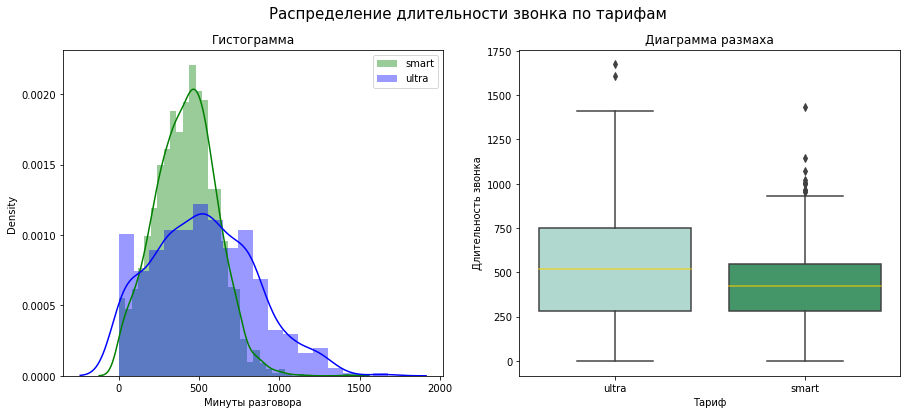

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))

axes[0] = plt.subplot(121)
sns.distplot(
    smart_slice['sum_calls'],
    label='smart',
    color= 'g'

   )
sns.distplot(
    ultra_slice['sum_calls'],
    label='ultra',
    color='b'
   )
plt.title('Гистограмма')
plt.xlabel('Минуты разговора')
plt.legend()

axes[1] = plt.subplot(122)
sns.boxplot(
    data =  big_table,
    x='tariff',
    y = 'sum_calls',
    palette='BuGn',
    medianprops=dict(color="#f7cf05", alpha=0.7)
)
plt.title('Диаграмма размаха')
plt.ylabel('Длительность звонка')
plt.xlabel('Тариф')

plt.suptitle('Распределение длительности звонка по тарифам', size=15)
plt.show()

    
**Количество израсходованных минут разговора**
    
- на тарифе 'smart' распределение стремится к нормальному. Наиболее частые значения (практически равные по частоте появления) 380 и 420 минут.
- на тарифе 'ultra' заметен сильный выброс в значении 0, остальные значения скошены вправо. Второе по частоте всречающееся значениее 500 минут.


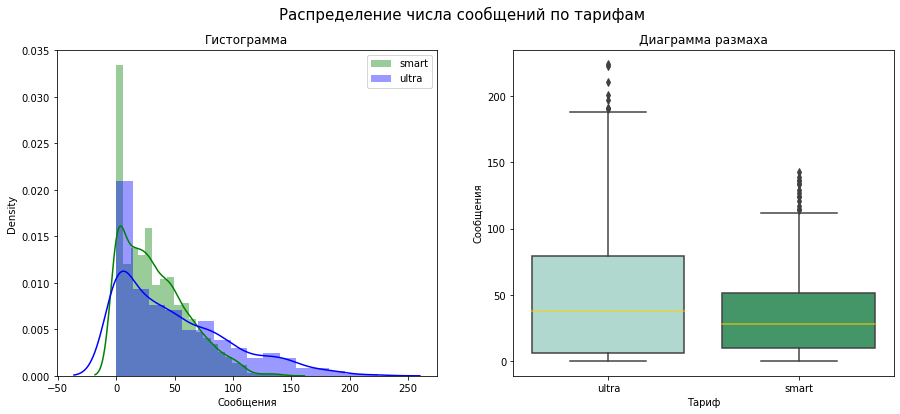

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))

axes[0] = plt.subplot(121)
sns.distplot(
    smart_slice['count_mess'],
    label='smart',
    color= 'g'

   )
sns.distplot(
    ultra_slice['count_mess'],
    label='ultra',
    color='b'
   )
plt.title('Гистограмма')
plt.xlabel('Сообщения')
plt.legend()

axes[1] = plt.subplot(122)
sns.boxplot(
    data =  big_table,
    x='tariff',
    y = 'count_mess',
    palette='BuGn',
    medianprops=dict(color="#f7cf05", alpha=0.7)
)
plt.title('Диаграмма размаха')
plt.ylabel('Сообщения')
plt.xlabel('Тариф')

plt.suptitle('Распределение числа сообщений по тарифам', size=15)
plt.show()

  
**Количество отправленных сообщений**
    
- на тарифе 'smart' заметна сильная скошенность вправо, распределение ассиметрично, сильный выброс в значении 0-5 сообщений.
- на тарифе 'ultra' так же заметна сильная скошенность вправо, распределение ассиметрично, однако сильный выброс уже в значении 0-10 сообщений.


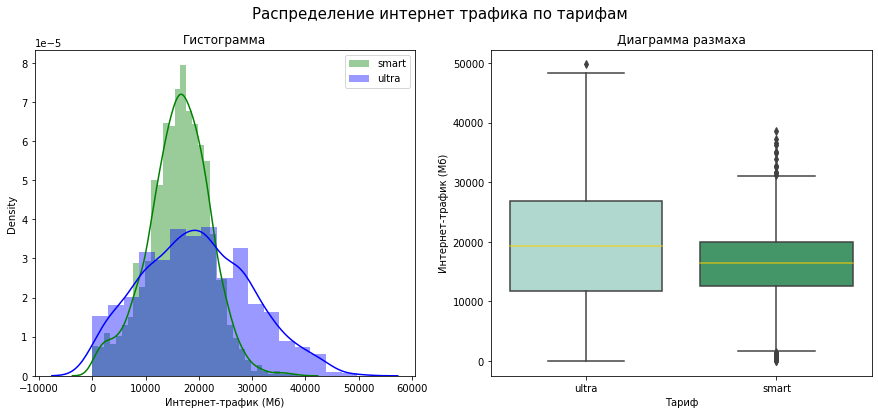

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))

axes[0] = plt.subplot(121)
sns.distplot(
    smart_slice['sum_internet'],
    label='smart',
    color= 'g'

   )
sns.distplot(
    ultra_slice['sum_internet'],
    label='ultra',
    color='b'
   )
plt.title('Гистограмма')
plt.xlabel('Интернет-трафик (Мб)')
plt.legend()

axes[1] = plt.subplot(122)
sns.boxplot(
    data =  big_table,
    x='tariff',
    y = 'sum_internet',
    palette='BuGn',
    medianprops=dict(color="#f7cf05", alpha=0.7)
)
plt.title('Диаграмма размаха')
plt.ylabel('Интернет-трафик (Мб)')
plt.xlabel('Тариф')

plt.suptitle('Распределение интернет трафика по тарифам', size=15)
plt.show()

**Объем израсходованного интернет-трафика в месяц.**
    
- на тарифе 'smart' распределение стремится к нормальному. Наиболее частое значение - 15-20 тыс. мб. Множественные выбросы выше максимума.
- на тарифе 'ultra' распределение стремится к нормальному, но заметна скошеность вправо. Наиболее частое значение - 15-20 тыс. мб.  


## Проверка гипотез

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.



**Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются**  
    
**H0**: Средняя выручка пользователей тарифа «Ультра» **равна** средней выручке пользователей тарифа «Смарт».     
    
**H1**: Средняя выручка пользователей тарифа «Ультра» **не равна** средней выручке пользователей тарифа «Смарт».  
Данные гипотезы выбраны в качестве нулевой и альтернативной потому что они противоречат друг другу и в случае если отвергается одна из них, другая не отвергается.


In [29]:
total_costs_smart = big_table.query('tariff == "smart"')['total_costs']
total_costs_ultra = big_table.query('tariff == "ultra"')['total_costs']

In [30]:
total_costs_smart.describe()

count    2229.000000
mean     1289.973531
std       818.404367
min       550.000000
25%       550.000000
50%      1023.000000
75%      1750.000000
max      6770.000000
Name: total_costs, dtype: float64

In [31]:
total_costs_ultra.describe()

count     985.000000
mean     2070.152284
std       376.187114
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: total_costs, dtype: float64

Перед проверкой гипотез проверим распределение и дисперсии выборок:

In [32]:
var_smart = np.var(total_costs_smart, ddof=1)
var_ultra = np.var(total_costs_ultra, ddof=1)

In [33]:
print(f'Дисперсии выборок: \n расходы на тарифе smart {var_smart}\
\n расходы на тарифе ultra {var_ultra}')

Дисперсии выборок: 
 расходы на тарифе smart 669785.7080064242
 расходы на тарифе ultra 141516.74507861826


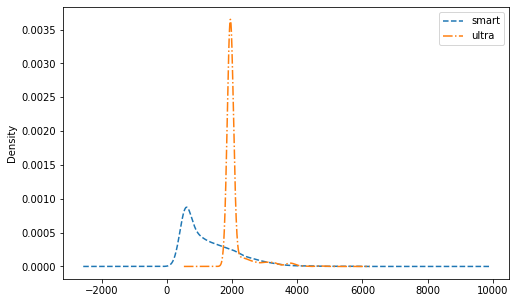

In [34]:
plt.figure(figsize=(8,5))
total_costs_smart.plot.density(style='--', label='smart')
total_costs_ultra.plot.density(style='-.', label='ultra')
plt.legend()
plt.show()

Дисперсии выборок не равны, их распределения близки к нормальным.

In [35]:
alpha = 0.01

results = st.ttest_ind(total_costs_smart, total_costs_ultra, equal_var = False)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  4.2606313931076085e-250
Отвергаем нулевую гипотезу


Согласно полученному значению p-value (4.2606313931076085e-250) можно отвергнуть нулевую гипотезу -   
    "Средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт»".  
Значение p-value значительно ниже критического уровеня статистической значимости (установлено для проверки этой гипотезы на уровне 0,01).    
Таким образом альтернативная гипотеза "Средняя выручка пользователей тарифа «Ультра» не равна средней выручке пользователей тарифа «Смарт»" не отвергается.      
</div>

**Гипотеза**  
**Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**  
    
**H0**: Средняя выручка пользователей из Москвы **равна** выручке пользователей из других регионов.     
    
**H1**: Средняя выручка пользователей из Москвы **не равна** выручке пользователей из других регионов.   
Данные гипотезы выбраны в качестве нулевой и альтернативной потому что они противоречат друг другу и в случае если отвергается одна из них, другая не отвергается.
</div>

In [36]:
group_city = big_table[['user_id', 'month', 'total_costs']].merge(data_users[['user_id', 'city']], on='user_id')

In [37]:
# Категоризирум данные по признаку город Москва / любой другой
def region(row):
    city = row['city'] 
    if city == 'Москва':
        return "Москва"
    else:
        return "другой"
group_city['city'] = group_city.apply(region, axis=1)
total_costs_mos = group_city.query('city == "Москва"')['total_costs']
total_costs_other = group_city.query('city != "Москва"')['total_costs']

Перед проверкой гипотез проверим распределение и дисперсии выборок:

In [38]:
var_mos = np.var(total_costs_mos, ddof=1)
var_other = np.var(total_costs_other, ddof=1)

In [39]:
print(f'Дисперсии выборок: \n расходы на мобильную связь в Москве {var_mos}\
\n расходы на мобильную связь в любом городе кроме Москвы {var_other}')

Дисперсии выборок: 
 расходы на мобильную связь в Москве 565636.467011886
 расходы на мобильную связь в любом городе кроме Москвы 654137.6285218114


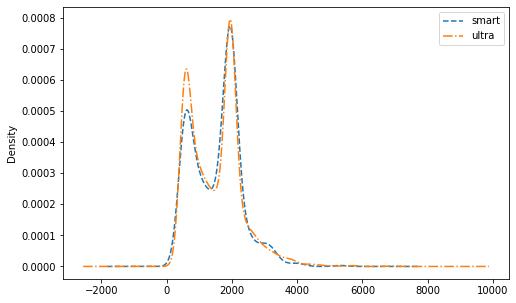

In [40]:
plt.figure(figsize=(8,5))
total_costs_mos.plot.density(style='--', label='smart')
total_costs_other.plot.density(style='-.', label='ultra')
plt.legend()
plt.show()

In [41]:
alpha = 0.01

results = st.ttest_ind(total_costs_mos, total_costs_other, equal_var = False)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


Для проверки гипотез проведена категоризация по региону проживания пользователя Москва / любой другой. Это реализовано с помощью собственной функции и метода apply()    
    
Согласно полученному значению p-value (0.5257376663729298) нельзя отвергнуть нулевую гипотезу -   
    "Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов".  
Значение p-value выше критического уровеня статистической значимости (установлено для проверки этой гипотезы на уровне 0,01).
Таким образом альтернативная гипотеза "Средняя выручка пользователей из Москвы не равна выручке пользователей из других регионов" будет отвергнута.   


## Общий вывод

Согласно проведенным иследованиям тарифов мобильного оператора "смарт" и "ультра" можно сделать следующие выводы:
- среднее количество, дисперсия и стандарное отклонение по тарифу "ультра" по всем анализируемым показателям 
(количество израсходованных минут разговора, количество отправленных сообщений, объем израсходованного интернет-трафика в месяц)
выше, чем по тарифу "смарт". Это свидетельствует о точ, что пользователи тарифа "ультра" более активно используют связь.
- в разрезе выручки тариф "ультра" имеет более высокий средний показатель, но и меньший разброс 1-3 квантили равны 1950 руб. 
В тарифе "смарт" разброс значений достаточно широкий - минимальное 550 руб, максимальное 6613 руб., а стандарное отклонение составляет 800руб.
- Провереные в ходе анализа гипотезы показали следующие результаты:
    - "средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются" была принята альтернативная гипотеза "Средняя выручка пользователей тарифа «Ультра» не равна средней выручке пользователей тарифа «Смарт»""
    - "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов" была принята нулевая гипотеза "Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов"
